In [47]:
import bt
from tiingo import TiingoClient
import pandas as pd
import matplotlib.pyplot as plt

client = TiingoClient({'api_key' : '9c884b918420c9220dcf832c83a6ba8025711e1e'})

start_date = '2000-01-01'
end_date = '2020-12-31'

ticker = ['SSO', 'VXX', 'TMF']

In [69]:
spy = client.get_dataframe("SPY",
                                    frequency='daily',
                                    metric_name='adjClose',
                                    startDate=start_date,
                                    endDate=end_date) 

In [74]:
spy = spy.to_frame()

In [30]:
tqqq_data = client.get_dataframe(ticker,
                                    frequency='daily',
                                    metric_name='adjClose',
                                    startDate=start_date,
                                    endDate=end_date)

data = tqqq_data.dropna()
data

In [68]:
hetan_monthly = bt.Strategy('hetan_monthly', [bt.algos.RunMonthly(),
bt.algos.SelectAll(),
bt.algos.WeighSpecified(SSO=0.45,TMF=0.5,VXX=0.05),
bt.algos.Rebalance()])

hetan_weekly = bt.Strategy('hetan_weekly', [bt.algos.RunWeekly(),
bt.algos.SelectAll(),
bt.algos.WeighSpecified(SSO=0.45,TMF=0.5,VXX=0.05),
bt.algos.Rebalance()])

hetan_daily = bt.Strategy('hetan_daily', [bt.algos.RunDaily(),
bt.algos.SelectAll(),
bt.algos.WeighSpecified(SSO=0.45,TMF=0.5,VXX=0.05),
bt.algos.Rebalance()])

hetan_quarter = bt.Strategy('hetan_quarter', [bt.algos.RunQuarterly(),
bt.algos.SelectAll(),
bt.algos.WeighSpecified(SSO=0.45,TMF=0.5,VXX=0.05),
bt.algos.Rebalance()])

benchmark = bt.Strategy("benchmark", [bt.algos.RunOnce(),
                           bt.algos.SelectAll(),
                           bt.algos.WeighEqually(),
                           bt.algos.Rebalance()])

In [79]:
hetan_45505 = bt.Strategy('hetan_45505', [bt.algos.RunMonthly(),
bt.algos.SelectAll(),
bt.algos.WeighSpecified(SSO=0.45,TMF=0.5,VXX=0.05),
bt.algos.Rebalance()])

hetan_207505 = bt.Strategy('hetan_207505', [bt.algos.RunMonthly(),
bt.algos.SelectAll(),
bt.algos.WeighSpecified(SSO=0.20,TMF=0.75,VXX=0.05),
bt.algos.Rebalance()])

hetan_801505 = bt.Strategy('hetan_801505', [bt.algos.RunMonthly(),
bt.algos.SelectAll(),
bt.algos.WeighSpecified(SSO=0.80,TMF=0.15,VXX=0.05),
bt.algos.Rebalance()])

hetan_343333 = bt.Strategy('hetan_343333', [bt.algos.RunMonthly(),
bt.algos.SelectAll(),
bt.algos.WeighSpecified(SSO=0.34,TMF=0.33,VXX=0.33),
bt.algos.Rebalance()])

benchmark = bt.Strategy("benchmark", [bt.algos.RunOnce(),
                           bt.algos.SelectAll(),
                           bt.algos.WeighEqually(),
                           bt.algos.Rebalance()])

In [80]:
t1 = bt.Backtest(hetan_455005, data)
t2 = bt.Backtest(hetan_207505, data)
t3 = bt.Backtest(hetan_801505, data)
t4 = bt.Backtest(hetan_343333, data)

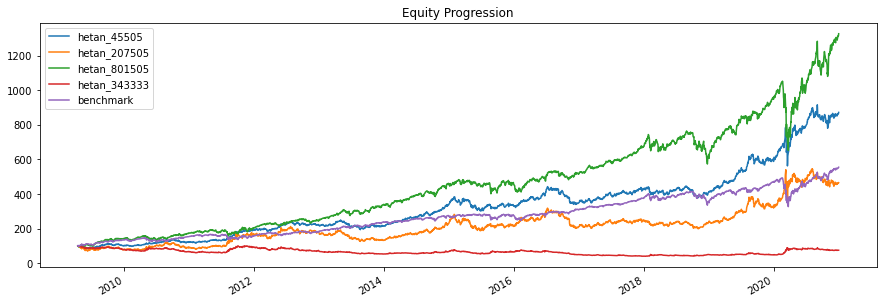

In [82]:
res2 = bt.run(t1, t2, t3, t4, bench)

%matplotlib inline

res2.plot()

In [83]:
res2.display()

Stat                 hetan_45505    hetan_207505    hetan_801505    hetan_343333    benchmark
-------------------  -------------  --------------  --------------  --------------  -----------
Start                2009-04-15     2009-04-15      2009-04-15      2009-04-15      2009-04-15
End                  2020-12-31     2020-12-31      2020-12-31      2020-12-31      2020-12-31
Risk-free rate       0.00%          0.00%           0.00%           0.00%           0.00%

Total Return         771.87%        365.22%         1227.26%        -25.62%         454.58%
Daily Sharpe         1.03           0.57            1.13            0.01            0.93
Daily Sortino        1.67           0.95            1.81            0.02            1.43
CAGR                 20.31%         14.03%          24.70%          -2.49%          15.75%
Max Drawdown         -28.61%        -40.73%         -38.00%         -60.69%         -33.70%
Calmar Ratio         0.71           0.34            0.65            -0.04   

In [75]:
month = bt.Backtest(hetan_monthly, data)
week = bt.Backtest(hetan_weekly, data)
day = bt.Backtest(hetan_daily, data)
quarter = bt.Backtest(hetan_quarter, data)
bench = bt.Backtest(benchmark, spy)

benchmark
0% [############################# ] 100% | ETA: 00:00:00

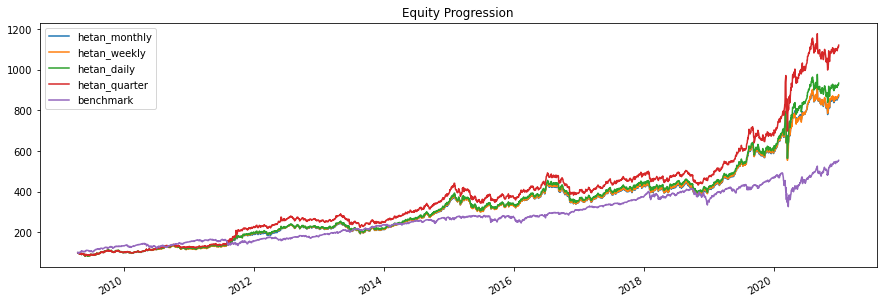

In [77]:
res = bt.run(month, week, day, quarter, bench)

%matplotlib inline

res.plot()

In [78]:
res.display()

Stat                 hetan_monthly    hetan_weekly    hetan_daily    hetan_quarter    benchmark
-------------------  ---------------  --------------  -------------  ---------------  -----------
Start                2009-04-15       2009-04-15      2009-04-15     2009-04-15       2009-04-15
End                  2020-12-31       2020-12-31      2020-12-31     2020-12-31       2020-12-31
Risk-free rate       0.00%            0.00%           0.00%          0.00%            0.00%

Total Return         771.87%          777.30%         834.80%        1021.66%         454.58%
Daily Sharpe         1.03             1.03            1.05           1.10             0.93
Daily Sortino        1.67             1.66            1.71           1.81             1.43
CAGR                 20.31%           20.37%          21.03%         22.92%           15.75%
Max Drawdown         -28.61%          -29.91%         -29.03%        -28.12%          -33.70%
Calmar Ratio         0.71             0.68            0.